<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-and-Summary" data-toc-modified-id="Introduction-and-Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction and Summary</a></span></li><li><span><a href="#Loading-and-cleaning-data" data-toc-modified-id="Loading-and-cleaning-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading and cleaning data</a></span></li><li><span><a href="#Data-Table-of-Totals,-%-of-Total,-and-%-of-Nights" data-toc-modified-id="Data-Table-of-Totals,-%-of-Total,-and-%-of-Nights-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Table of Totals, % of Total, and % of Nights</a></span></li><li><span><a href="#Weekly-Data-Frame" data-toc-modified-id="Weekly-Data-Frame-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Weekly Data Frame</a></span></li><li><span><a href="#Plotting-data" data-toc-modified-id="Plotting-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plotting data</a></span></li></ul></div>

# Introduction and Summary

The Phoenix Bat Cave, located at 43rd Street and Camelback Rd in Phoenix, AZ, was monitored for bat activity for the entirety of 2021.  The Bat Cave is a large flood control structure in downtown Phoenix that has become an important year round roosting site for bats in the urban environment.  A Wildlife Acoustics Echometer Mini Bat recorder was deployed approxymately 100 meters from the mouth of the cave and 5 meters above ground level in 2021.  A total of 271 nights of echolocation recordings were collected over the course of the year starting December 2020 and ending December 2021.  Recordings were analyzed with Wildlife Acoustics Kaleidoscope Pro Software, with parameters set for a minimum of five echolocation pulses and on conservative identification of bat call recording identification.  Each species identified by the software was positively identified manually, but not all calls were manually identified.  For this reason, counts should be viewed as estimates rather then absolute positive counts of bat detections.  A total of 12 species were positively identified at the mouth of the Bat Cave.  Of these species Mexican free-tailed bats (TADBRA) were by far the most abundant composing approxymately 51.9% of positively identified calls.  Silver haired (LASNOC) and big brown bats (EPTFUS) were of secondary importance composing approxymately 7.1 to 7.8% respectively of positively identified calls. Hoary bats (LASCIN) were found to be approxymately 2.6% of positively identified calls with all other species being under 1% of positively identified calls.  Bat activity and species varied through out the course of the year with April through October having the highest levels of activity and species present.  High levels of bat activity were found year round with certain species being more common during different times of the year.  

Summary of data analysis:
1. Remove bats not positively identified from data frame, clean data
2. Make data table of species, species total detections, species % of total detections
3. Make weekly averages and standard error data frame
5. Plot time series weekly averages with standard error band

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Loading and cleaning data

In [2]:
df = pd.ExcelFile('Bat Cave Master.xlsx')
df = df.parse('Sheet1')

In [3]:
df.head()

,Date,Date.1,ANTPAL,CORTOW,EPTFUS,EUDMAC,EUMPER,EUMUND,LASBLO,LASCIN,...,MYOVOL,MYOYUM,NYCFEM,NYCMAC,PARHES,TADBRA,NOID,Total detections,NOISE,Species
0,2020-12-23,20201223,1.0,NaN,349.0,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,366,382,1263,61,6
1,2020-12-24,20201224,NaN,NaN,130.0,NaN,NaN,1.0,1.0,54.0,...,NaN,NaN,NaN,NaN,NaN,357,338,1008,72,6
2,2020-12-25,20201225,NaN,NaN,71.0,NaN,NaN,NaN,NaN,84.0,...,NaN,NaN,NaN,NaN,NaN,625,451,1402,116,4
3,2020-12-26,20201226,NaN,NaN,18.0,NaN,NaN,NaN,NaN,61.0,...,NaN,3.0,NaN,NaN,1.0,450,269,906,93,6
4,2020-12-27,20201227,NaN,NaN,58.0,NaN,NaN,NaN,1.0,100.0,...,NaN,NaN,1.0,NaN,3.0,805,439,1575,147,8


In [4]:
df.shape

(271, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              271 non-null    datetime64[ns]
 1   Date.1            271 non-null    int64         
 2   ANTPAL            72 non-null     float64       
 3   CORTOW            4 non-null      float64       
 4   EPTFUS            266 non-null    float64       
 5   EUDMAC            0 non-null      float64       
 6   EUMPER            2 non-null      float64       
 7   EUMUND            70 non-null     float64       
 8   LASBLO            124 non-null    float64       
 9   LASCIN            267 non-null    float64       
 10  LASNOC            270 non-null    float64       
 11  LASXAN            94 non-null     float64       
 12  MACCAL            0 non-null      float64       
 13  MYOCAL            63 non-null     float64       
 14  MYOCIL            4 non-nu

In [6]:
df.sum()

Date.1              5.477009e+09
ANTPAL              1.256000e+03
CORTOW              5.000000e+00
EPTFUS              3.299100e+04
EUDMAC              0.000000e+00
EUMPER              5.000000e+00
EUMUND              9.200000e+01
LASBLO              4.290000e+02
LASCIN              1.188000e+04
LASNOC              3.619300e+04
LASXAN              2.327000e+03
MACCAL              0.000000e+00
MYOCAL              1.530000e+02
MYOCIL              4.000000e+00
MYOEVO              0.000000e+00
MYOOCC              1.000000e+00
MYOTHY              0.000000e+00
MYOVEL              0.000000e+00
MYOVOL              0.000000e+00
MYOYUM              2.220000e+03
NYCFEM              7.100000e+01
NYCMAC              6.000000e+00
PARHES              2.714000e+03
TADBRA              2.397970e+05
NOID                1.322980e+05
Total detections    4.624420e+05
NOISE               1.712000e+04
Species             1.975000e+03
dtype: float64

In [7]:
#Drop species that could not be verified. Also drop Unnamed: 1.
df = df.drop(columns = ['CORTOW', 'EUDMAC', 'EUMPER', 'MACCAL', 'MYOCIL', 'MYOEVO', 'MYOOCC', 'MYOTHY', 
                        'MYOVEL', 'MYOVOL', 'NYCMAC', 'Date.1', 'NOISE'])

In [8]:
df.columns

Index(['Date', 'ANTPAL', 'EPTFUS', 'EUMUND', 'LASBLO', 'LASCIN', 'LASNOC',
       'LASXAN', 'MYOCAL', 'MYOYUM', 'NYCFEM', 'PARHES', 'TADBRA', 'NOID',
       'Total detections', 'Species'],
      dtype='object')

In [9]:
#Fill NA with 0
df = df.fillna(value = 0)

#  Data Table of Totals, % of Total, and % of Nights

In [11]:
#Sum all detections
x = df.sum()
#% of all detections
y = df.sum() / df['Total detections'].sum() * 100

z = []
for i in list(x.index):
    z.append(round(sum(df[i] > 0) / len(df) * 100, 2))

tots = pd.DataFrame()
tots['species'] = list(x.index)
tots['totals'] = list(x)
tots['% of total'] = list(round(y, 2))
tots['% of nights'] = z

tots.index = tots.species
tots = tots.drop(columns = 'species')

In [12]:
tots.sort_values(by = ['totals'], ascending=False)

,totals,% of total,% of nights
species,,,
Total detections,462442.0,100.00,100.00
TADBRA,239797.0,51.85,100.00
NOID,132298.0,28.61,100.00
LASNOC,36193.0,7.83,99.63
EPTFUS,32991.0,7.13,98.15
LASCIN,11880.0,2.57,98.52
PARHES,2714.0,0.59,65.68
LASXAN,2327.0,0.50,34.69
MYOYUM,2220.0,0.48,85.98


# Weekly Data Frame

In [12]:
df.index = df['Date']

In [13]:
df.Date.max()

Timestamp('2021-12-31 00:00:00')

In [14]:
df.Date.min()

Timestamp('2020-12-23 00:00:00')

In [15]:
#Make weekly average dataframe
weekly = df.resample('W', on='Date').mean()  
weekly.shape

(54, 15)

In [16]:
#Fill NA's in weekly dataframe to connect linearly from last value to next value
weekly = weekly.interpolate(method ='linear', limit_direction ='forward') 

In [17]:
#Make weekly average standard error dataframe
se = df.resample('W', on='Date').sem()  
se.shape

(54, 15)

In [18]:
#Fill NA's in standard error dataframe to connect linearly from last value to next value
se = se.interpolate(method ='linear', limit_direction ='forward') 

In [19]:
weekly = weekly.merge(se, on = 'Date', suffixes=('', '_se'))

In [20]:
weekly.to_csv('batcaveweekly.csv')

# Plotting data

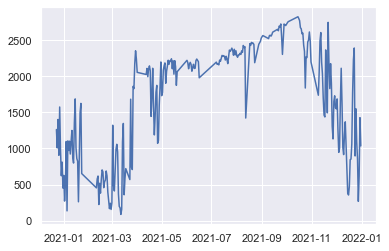

In [21]:
#Plot total bats detected nightly
sns.set()
plt.plot(df['Total detections'])
plt.show()

<ipython-input-22-9f1b0c9d7bc6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


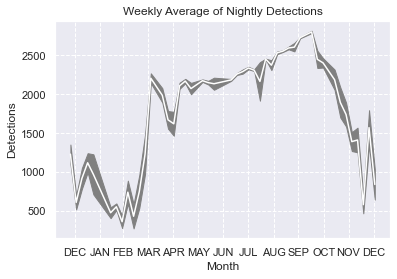

In [22]:
#Plot weekly average of bats detected 
months = ['DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
plt.plot(weekly['Total detections'], color = 'white')
ax = plt.axes()
plt.xlabel('Month')
plt.ylabel('Detections')
plt.title('Weekly Average of Nightly Detections')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
ax.fill_between(weekly.index, weekly['Total detections'] - weekly['Total detections_se'], 
                weekly['Total detections'] + weekly['Total detections_se'], color = 'gray')
ax.set_xticklabels(months)
plt.grid(linestyle = '--')
plt.show()

<ipython-input-23-3608ca3644e4>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


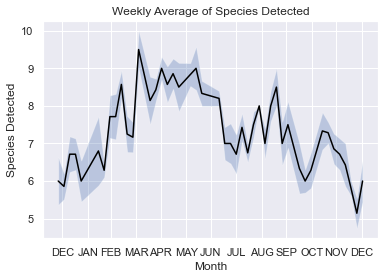

In [23]:
#Plot weekly average of bat species detected 
months = ['DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
sns.set()

plt.plot(weekly['Species'], color = 'black')
ax = plt.axes()
plt.xlabel('Month')
plt.ylabel('Species Detected')
plt.title('Weekly Average of Species Detected')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
ax.fill_between(weekly.index, weekly['Species'] - weekly['Species_se'], weekly['Species'] + 
                weekly['Species_se'], alpha = 0.3)
ax.set_xticklabels(months)
#plt.grid(linestyle = '--')
plt.show()

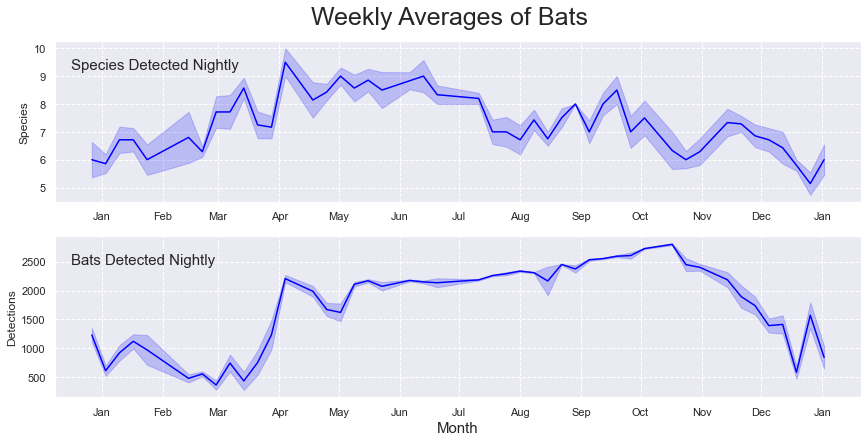

In [24]:
#Plotting the above two plots together in a subplot for better display of data.

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,6))
fig.suptitle('Weekly Averages of Bats', fontsize=25)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
sns.set()

#Total species
ax1.plot(weekly.Species, color = 'blue')
ax1.text(0.02, 0.85, 'Species Detected Nightly', fontsize = 15, horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes)
ax1.set(ylabel = 'Species')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.fill_between(weekly.index, weekly['Species'] - weekly['Species_se'], weekly['Species'] + 
                weekly['Species_se'], color = 'blue', alpha = 0.2)
ax1.grid(linestyle = '--')

#Total Detections
ax2.plot(weekly['Total detections'], color = 'blue')
ax2.set(ylabel = 'Detections')
ax2.text(0.02, 0.85, 'Bats Detected Nightly', fontsize = 15, horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax2.fill_between(weekly.index, weekly['Total detections'] - weekly['Total detections_se'], 
                weekly['Total detections'] + weekly['Total detections_se'], color = 'blue', alpha = 0.2)
ax2.grid(linestyle = '--')

plt.xlabel("Month", fontsize = '15')
plt.show()

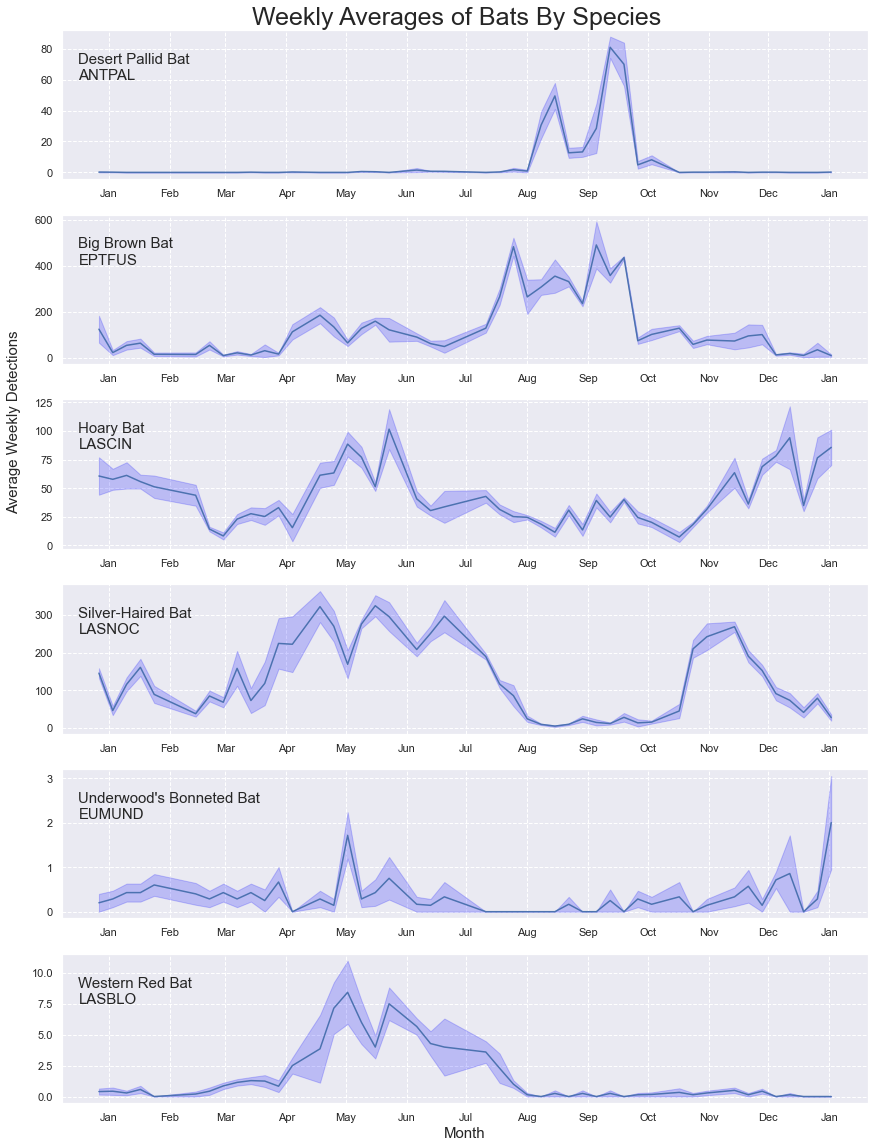

In [25]:
#Plotting the most common species and species of interest.

fig, (ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(6, 1, figsize=(12,16))
fig.suptitle('Weekly Averages of Bats By Species', fontsize=25)
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.xlabel("Month", fontsize = '15')
fig.text(-0.02, 0.62, 'Average Weekly Detections', va='center', rotation='vertical', fontsize = 15)

#ANTPAL
ax3.plot(weekly.ANTPAL, label = 'Weekly')
ax3.text(0.02, 0.85, 'Desert Pallid Bat \nANTPAL', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax3.transAxes)
ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax3.fill_between(weekly.index, weekly['ANTPAL'] - weekly['ANTPAL_se'], 
                weekly['ANTPAL'] + weekly['ANTPAL_se'], color = 'blue', alpha = 0.2)
ax3.grid(linestyle = '--')

#EPTFUS
ax4.plot(weekly.EPTFUS, label = 'Weekly')
ax4.text(0.02, 0.85, 'Big Brown Bat \nEPTFUS', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax4.transAxes)
ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax4.fill_between(weekly.index, weekly['EPTFUS'] - weekly['EPTFUS_se'], 
                weekly['EPTFUS'] + weekly['EPTFUS_se'], color = 'blue', alpha = 0.2)
ax4.grid(linestyle = '--')

#LASCIN
ax5.plot(weekly.LASCIN, label = 'Weekly')
ax5.text(0.02, 0.85, 'Hoary Bat \nLASCIN', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax5.transAxes)
ax5.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax5.fill_between(weekly.index, weekly['LASCIN'] - weekly['LASCIN_se'], 
                weekly['LASCIN'] + weekly['LASCIN_se'], color = 'blue', alpha = 0.2)
ax5.grid(linestyle = '--')

#LASNOC
ax6.plot(weekly.LASNOC, label = 'Weekly')
ax6.text(0.02, 0.85, 'Silver-Haired Bat \nLASNOC', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax6.transAxes)
ax6.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax6.fill_between(weekly.index, weekly['LASNOC'] - weekly['LASNOC_se'], 
                weekly['LASNOC'] + weekly['LASNOC_se'], color = 'blue', alpha = 0.2)
ax6.grid(linestyle = '--')

#EUMUND
ax7.plot(weekly.EUMUND, label = 'Weekly')
ax7.text(0.02, 0.85, "Underwood's Bonneted Bat \nEUMUND", fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax7.transAxes)
ax7.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax7.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax7.fill_between(weekly.index, weekly['EUMUND'] - weekly['EUMUND_se'], 
                weekly['EUMUND'] + weekly['EUMUND_se'], color = 'blue', alpha = 0.2)
ax7.grid(linestyle = '--')

#LASBLO
ax8.plot(weekly.LASBLO, label = 'Weekly')
ax8.text(0.02, 0.85, 'Western Red Bat \nLASBLO', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax8.transAxes)
ax8.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax8.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax8.fill_between(weekly.index, weekly['LASBLO'] - weekly['LASBLO_se'], 
                weekly['LASBLO'] + weekly['LASBLO_se'], color = 'blue', alpha = 0.2)
ax8.grid(linestyle = '--')

plt.show()

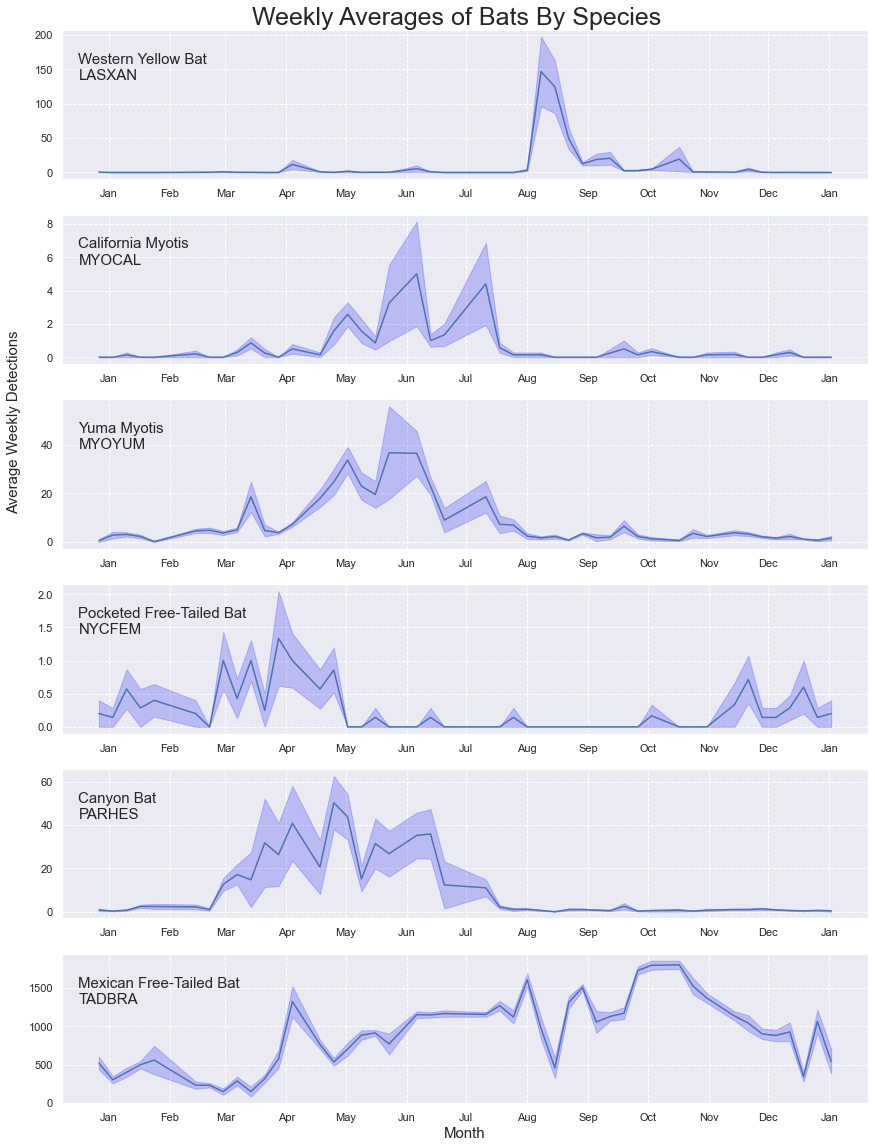

In [26]:
#Plotting the most common species and species of interest.  
#Two different subplots for better viewing of data.

fig, (ax9, ax10, ax11, ax12, ax13, ax14) = plt.subplots(6, 1, figsize=(12,16))
fig.suptitle('Weekly Averages of Bats By Species', fontsize=25)
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.xlabel("Month", fontsize = '15')
fig.text(-0.02, 0.62, 'Average Weekly Detections', va='center', rotation='vertical', fontsize = 15)

#LASXAN
ax9.plot(weekly.LASXAN, label = 'Weekly')
ax9.text(0.02, 0.85, 'Western Yellow Bat \nLASXAN', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax9.transAxes)
ax9.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax9.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax9.fill_between(weekly.index, weekly['LASXAN'] - weekly['LASXAN_se'], 
                weekly['LASXAN'] + weekly['LASXAN_se'], color = 'blue', alpha = 0.2)
ax9.grid(linestyle = '--')

#MYOCAL
ax10.plot(weekly.MYOCAL, label = 'Weekly')
ax10.text(0.02, 0.85, 'California Myotis \nMYOCAL', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax10.transAxes)
ax10.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax10.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax10.fill_between(weekly.index, weekly['MYOCAL'] - weekly['MYOCAL_se'], 
                weekly['MYOCAL'] + weekly['MYOCAL_se'], color = 'blue', alpha = 0.2)
ax10.grid(linestyle = '--')

#MYOYUM
ax11.plot(weekly.MYOYUM, label = 'Weekly')
ax11.text(0.02, 0.85, 'Yuma Myotis \nMYOYUM', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax11.transAxes)
ax11.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax11.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax11.fill_between(weekly.index, weekly['MYOYUM'] - weekly['MYOYUM_se'], 
                weekly['MYOYUM'] + weekly['MYOYUM_se'], color = 'blue', alpha = 0.2)
ax11.grid(linestyle = '--')

#NYCFEM
ax12.plot(weekly.NYCFEM, label = 'Weekly')
ax12.text(0.02, 0.85, 'Pocketed Free-Tailed Bat \nNYCFEM', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax12.transAxes)
ax12.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax12.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax12.fill_between(weekly.index, weekly['NYCFEM'] - weekly['NYCFEM_se'], 
                weekly['NYCFEM'] + weekly['NYCFEM_se'], color = 'blue', alpha = 0.2)
ax12.grid(linestyle = '--')

#PARHES
ax13.plot(weekly.PARHES, label = 'Weekly')
ax13.text(0.02, 0.85, 'Canyon Bat \nPARHES', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax13.transAxes)
ax13.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax13.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax13.fill_between(weekly.index, weekly['PARHES'] - weekly['PARHES_se'], 
                weekly['PARHES'] + weekly['PARHES_se'], color = 'blue', alpha = 0.2)
ax13.grid(linestyle = '--')

#TADBRA
ax14.plot(weekly.TADBRA, label = 'Weekly')
plt.xlabel('Month')
ax14.text(0.02, 0.85, "Mexican Free-Tailed Bat \nTADBRA", fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax14.transAxes)
ax14.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax14.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax14.fill_between(weekly.index, weekly['TADBRA'] - weekly['TADBRA_se'], 
                weekly['TADBRA'] + weekly['TADBRA_se'], color = 'blue', alpha = 0.2)
ax14.grid(linestyle = '--')

plt.show()